In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, recall_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
df = pd.read_csv("order_delay_cleaned.csv")

In [24]:
# Define final features and target
features = [
    'shipping_time_days',
    'purchase_dayofweek',
    'purchase_month',
    'customer_state',
    'freight_value'
]
target = 'is_late'

X = df[features]
y = df[target]

In [25]:
# One-hot encode customer_state
X = pd.get_dummies(X, columns=['customer_state'], drop_first=True)

In [26]:
X.head()

,shipping_time_days,purchase_dayofweek,purchase_month,freight_value,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,2.0,0,10,8.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1,7,22.76,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,8,19.22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,5,11,27.20,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,1,2,8.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Stratified split to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:

# Train with class weighting to address imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

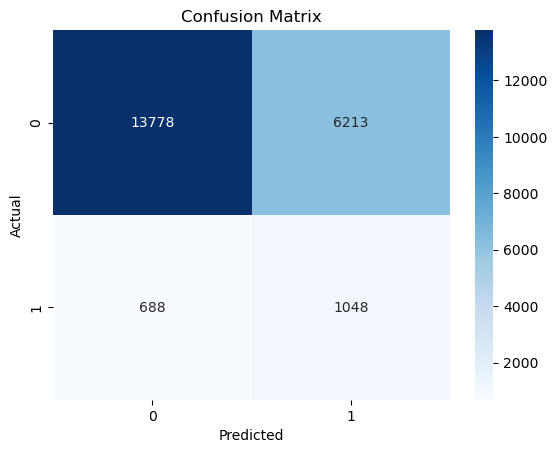

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     19991
           1       0.14      0.60      0.23      1736

    accuracy                           0.68     21727
   macro avg       0.55      0.65      0.52     21727
weighted avg       0.89      0.68      0.75     21727



In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

### Recall 

Recall for Class 1 = What % of actual late orders did we correctly predict as late?

It answers: “If a delay is coming, will we catch it?”

###

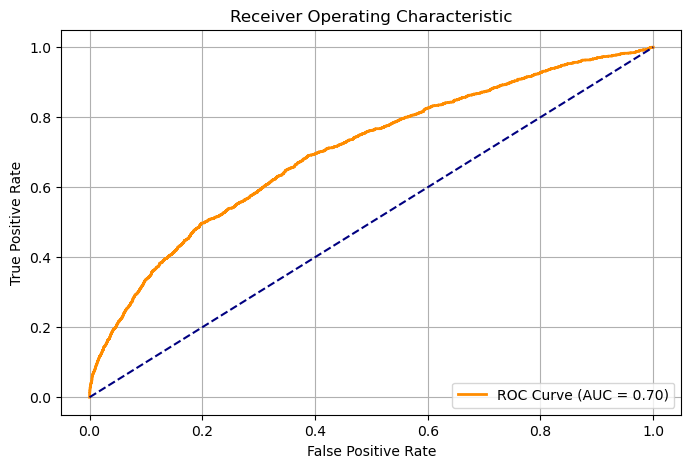

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




## lets try Random forest

In [46]:
# Initialize Random Forest with class_weight to handle imbalance
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Helps improve recall for minority class
    max_depth=10              # Optional: control overfitting
)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [48]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88     19990
           1       0.22      0.64      0.33      1736

    accuracy                           0.79     21726
   macro avg       0.59      0.72      0.60     21726
weighted avg       0.90      0.79      0.83     21726



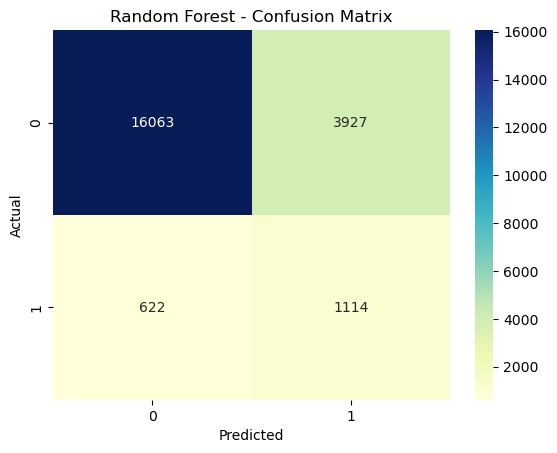

In [49]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

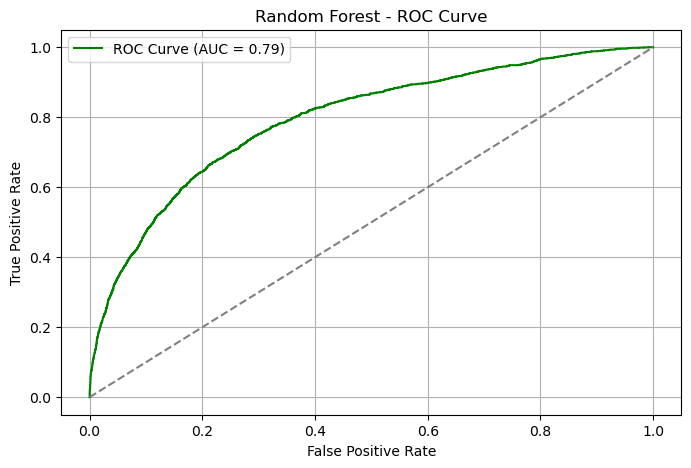

In [50]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_rf, tpr_rf, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_rf), color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

In [53]:
from xgboost import XGBClassifier

# Initialize model with balanced settings
xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(len(y) - y.sum()) / y.sum(),  # helps with class imbalance
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)


C:\Users\Rishikesh\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:43:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [54]:
# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     19990
           1       0.21      0.68      0.32      1736

    accuracy                           0.77     21726
   macro avg       0.59      0.73      0.59     21726
weighted avg       0.91      0.77      0.82     21726



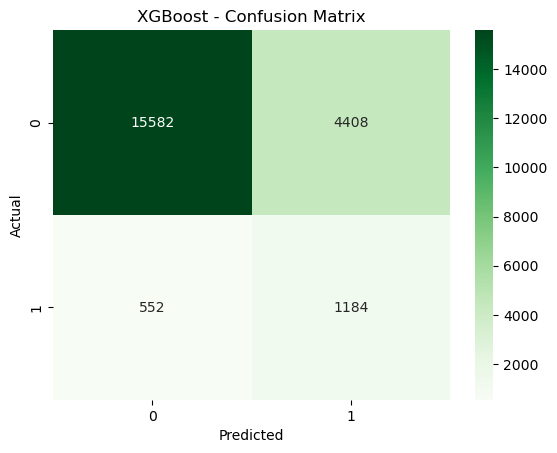

In [55]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

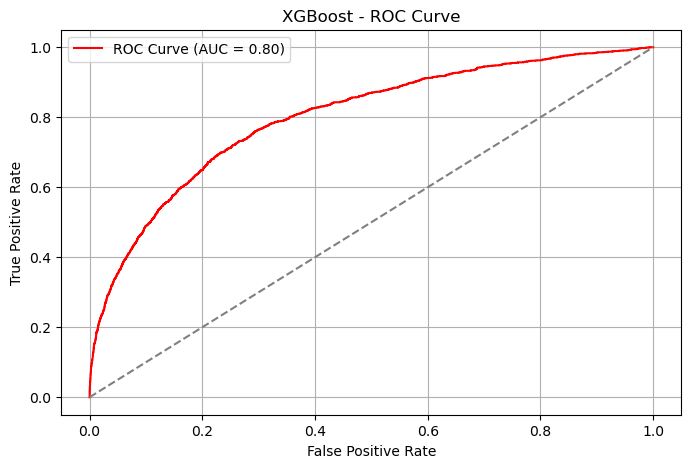

In [56]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 5))
plt.plot(fpr_xgb, tpr_xgb, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_xgb), color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend()
plt.grid(True)
plt.show()



| Model               | Recall (Late) | F1 (Late) | AUC      | Comment                       |
| ------------------- | ------------- | --------- | -------- | ----------------------------- |
| Logistic Regression | 0.60          | 0.23      | \~0.66   | Baseline, fast, interpretable |
| Random Forest       | 0.64          | 0.33      | 0.79     | Stronger, more flexible       |
| **XGBoost**         | **0.68**      | **0.32**  | **0.80** |  **Best performer overall** |


<Figure size 1000x600 with 0 Axes>

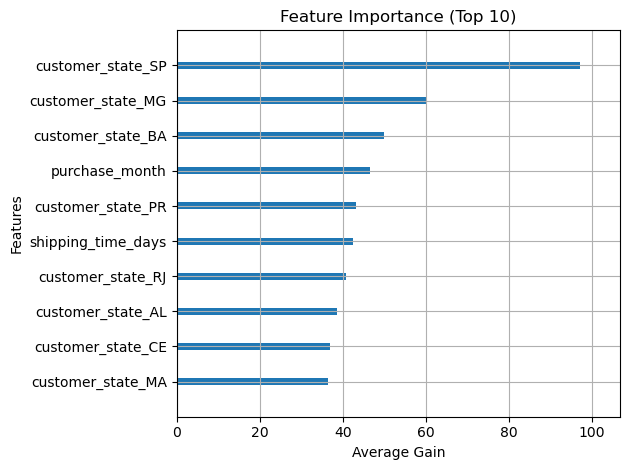

In [59]:
from xgboost import plot_importance

# Plot top features
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain', title='Feature Importance (Top 10)', xlabel='Average Gain', show_values=False)
plt.tight_layout()
plt.show()

Fine Tunning model 

In [62]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [63]:
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 150],
    'scale_pos_weight': [5, 10],  # approx (neg:pos ratio)
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

In [64]:
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='recall',  # Focus on catching more delays
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\Rishikesh\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [20:08:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=No...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1, 0.3],
                         'max_depth': [4, 6, 8], 'n_estimators': [100, 150],
                         'scale_pos_weight': [5, 10], 'subsample': [0.8]},
             scoring='recall', verbose=1)

In [65]:
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

# Save the best model
best_model = grid_search.best_estimator_

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'scale_pos_weight': 10, 'subsample': 0.8}
Best recall score: 0.6414577931431863


              precision    recall  f1-score   support

           0       0.97      0.78      0.86     19990
           1       0.21      0.68      0.32      1736

    accuracy                           0.77     21726
   macro avg       0.59      0.73      0.59     21726
weighted avg       0.91      0.77      0.82     21726

ROC AUC: 0.8009786863477822


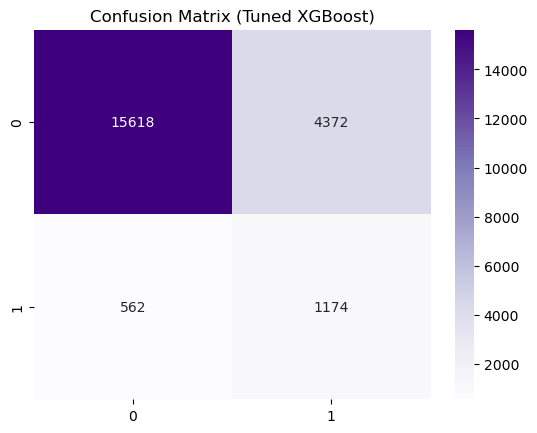

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Predict
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# Report
print(classification_report(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (Tuned XGBoost)")
plt.show()

| Metric               | Value    | 🔍 Interpretation                                            |
| -------------------- | -------- | ------------------------------------------------------------ |
| **Recall (Late)**    | **0.68** | 68% of all real delays correctly predicted — strong signal |
| **Precision (Late)** | 0.21     |  Still some false alarms — acceptable in your use case     |
| **F1 Score (Late)**  | 0.32     | Best among all models so far                                 |
| **AUC**              | **0.80** | Excellent class separation                                |
| **Accuracy**         | 77%      | Not misleading — but recall is more important here           |


Export the model in pkl file 


In [70]:
import pickle
best_model = grid_search.best_estimator_

# Save the model to disk
with open("final_xgboost_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model exported as final_xgboost_model.pkl")

✅ Model exported as final_xgboost_model.pkl
